In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data

In [2]:
datas = pd.read_csv('data.csv')
datas.head()

,AS1,AS2,AS3,AS4,AS5,AS6,AS7,AS8,AS9,AS10,...,DO3,DO4,DO5,DO6,DO7,DO8,DO9,DO10,age,gender
0,4,4,3,3,5,4,1,3,1,1,...,3,1,3,2,5,4,2,1,29,2
1,4,3,4,4,3,2,3,3,4,3,...,3,2,3,2,3,3,2,2,49,2
2,5,4,4,5,3,3,2,2,1,1,...,3,3,3,4,4,5,2,3,52,1
3,4,3,3,2,3,3,4,3,4,1,...,3,3,4,4,4,5,3,1,34,2
4,4,4,4,4,4,3,2,1,2,0,...,4,3,4,3,5,5,4,4,52,2


In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AS1     1005 non-null   int64
 1   AS2     1005 non-null   int64
 2   AS3     1005 non-null   int64
 3   AS4     1005 non-null   int64
 4   AS5     1005 non-null   int64
 5   AS6     1005 non-null   int64
 6   AS7     1005 non-null   int64
 7   AS8     1005 non-null   int64
 8   AS9     1005 non-null   int64
 9   AS10    1005 non-null   int64
 10  SC1     1005 non-null   int64
 11  SC2     1005 non-null   int64
 12  SC3     1005 non-null   int64
 13  SC4     1005 non-null   int64
 14  SC5     1005 non-null   int64
 15  SC6     1005 non-null   int64
 16  SC7     1005 non-null   int64
 17  SC8     1005 non-null   int64
 18  SC9     1005 non-null   int64
 19  SC10    1005 non-null   int64
 20  AD1     1005 non-null   int64
 21  AD2     1005 non-null   int64
 22  AD3     1005 non-null   int64
 23  AD4     1005 

### Cleaning data

In [4]:
datas = datas.replace(0, pd.NA)
datas = datas.dropna()

In [5]:
datas.head()

,AS1,AS2,AS3,AS4,AS5,AS6,AS7,AS8,AS9,AS10,...,DO3,DO4,DO5,DO6,DO7,DO8,DO9,DO10,age,gender
1,4,3,4,4,3,2,3,3,4,3,...,3,2,3,2,3,3,2,2,49,2
2,5,4,4,5,3,3,2,2,1,1,...,3,3,3,4,4,5,2,3,52,1
3,4,3,3,2,3,3,4,3,4,1,...,3,3,4,4,4,5,3,1,34,2
5,3,4,4,3,3,3,3,2,3,3,...,3,4,4,4,3,4,4,3,27,2
6,4,5,4,3,4,3,2,2,1,1,...,4,2,2,2,2,4,1,1,46,2


In [6]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898 entries, 1 to 1003
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AS1     898 non-null    object
 1   AS2     898 non-null    object
 2   AS3     898 non-null    object
 3   AS4     898 non-null    object
 4   AS5     898 non-null    object
 5   AS6     898 non-null    object
 6   AS7     898 non-null    object
 7   AS8     898 non-null    object
 8   AS9     898 non-null    object
 9   AS10    898 non-null    object
 10  SC1     898 non-null    object
 11  SC2     898 non-null    object
 12  SC3     898 non-null    object
 13  SC4     898 non-null    object
 14  SC5     898 non-null    object
 15  SC6     898 non-null    object
 16  SC7     898 non-null    object
 17  SC8     898 non-null    object
 18  SC9     898 non-null    object
 19  SC10    898 non-null    object
 20  AD1     898 non-null    object
 21  AD2     898 non-null    object
 22  AD3     898 non-null    object

### Visualize the data

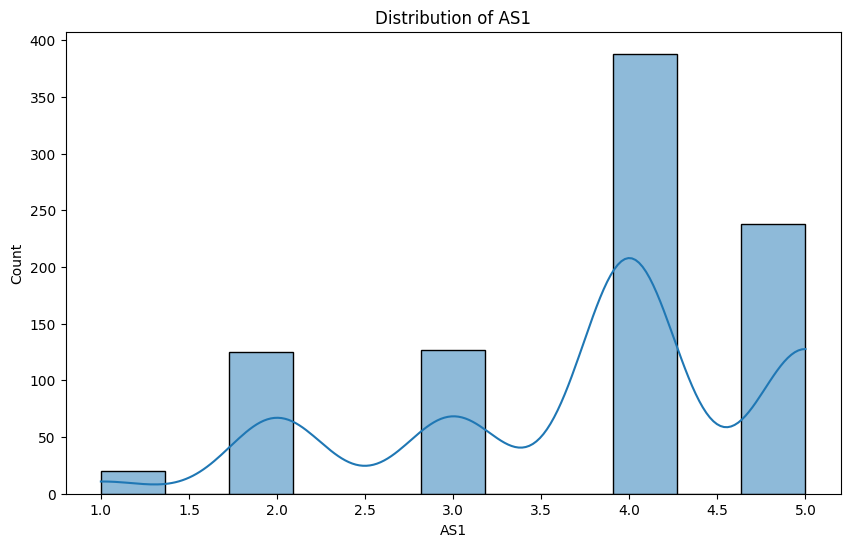

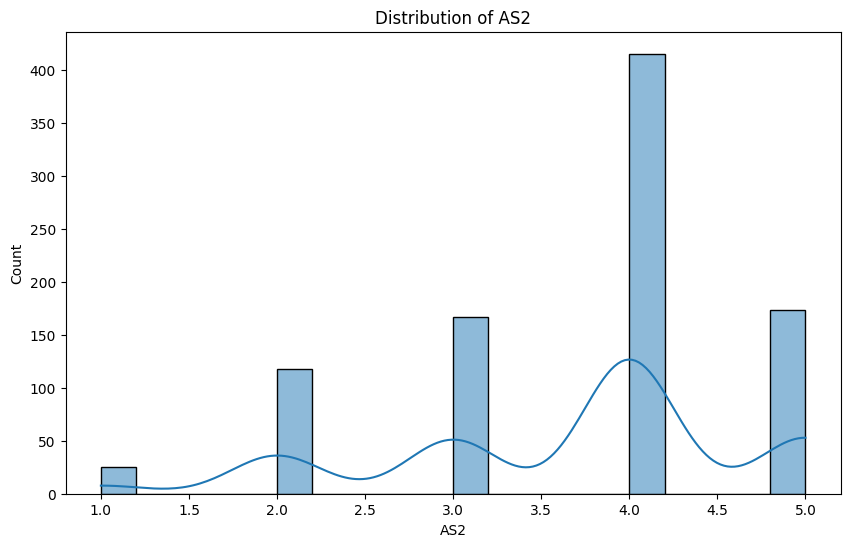

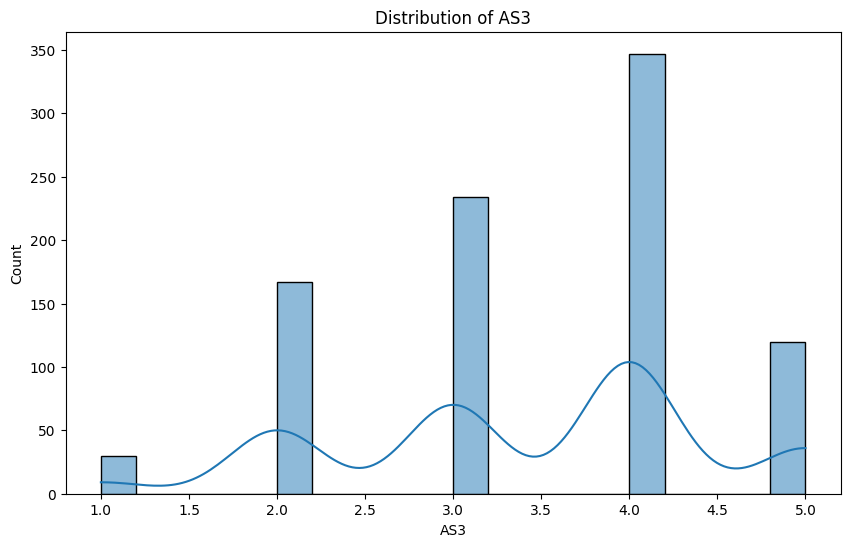

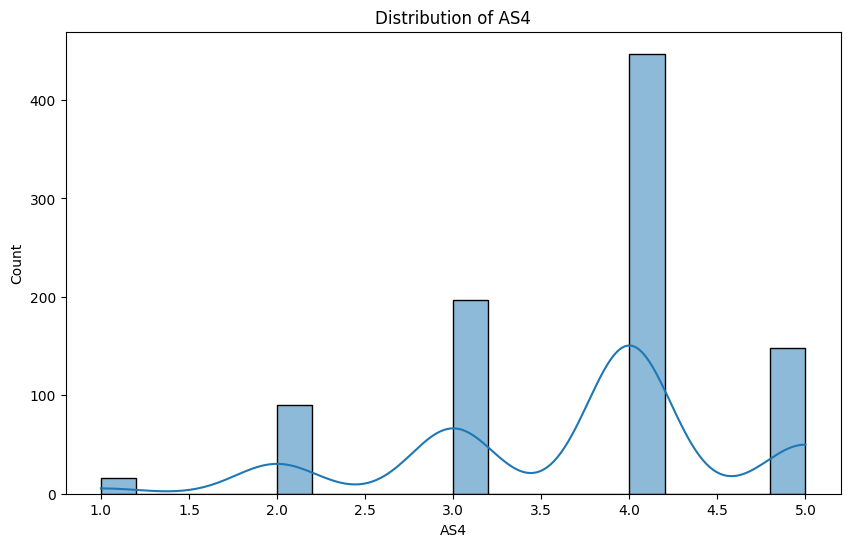

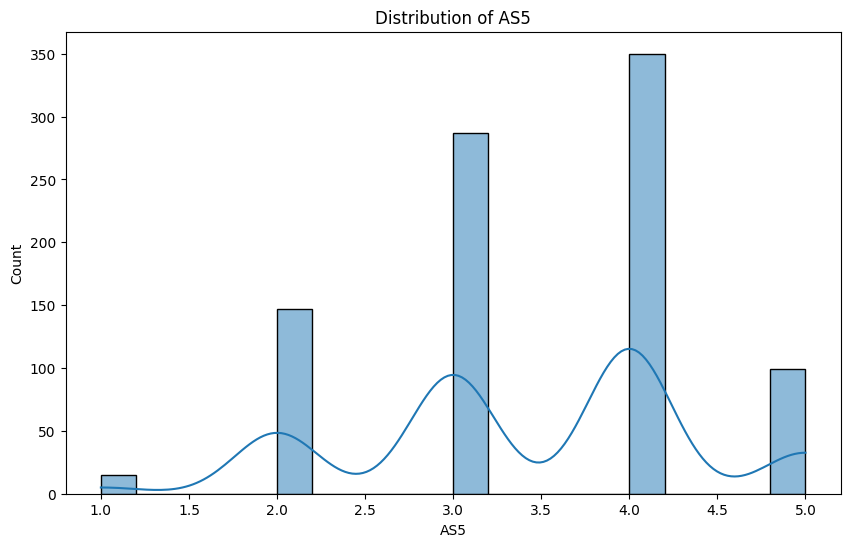

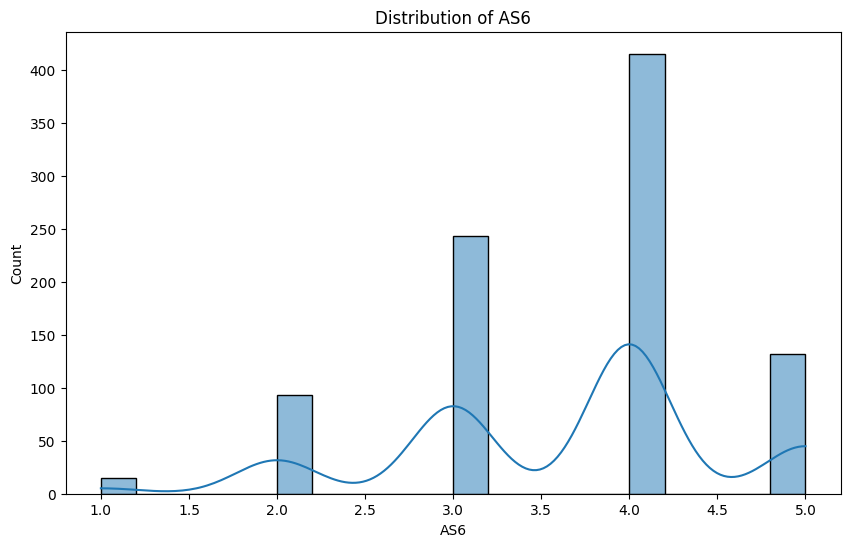

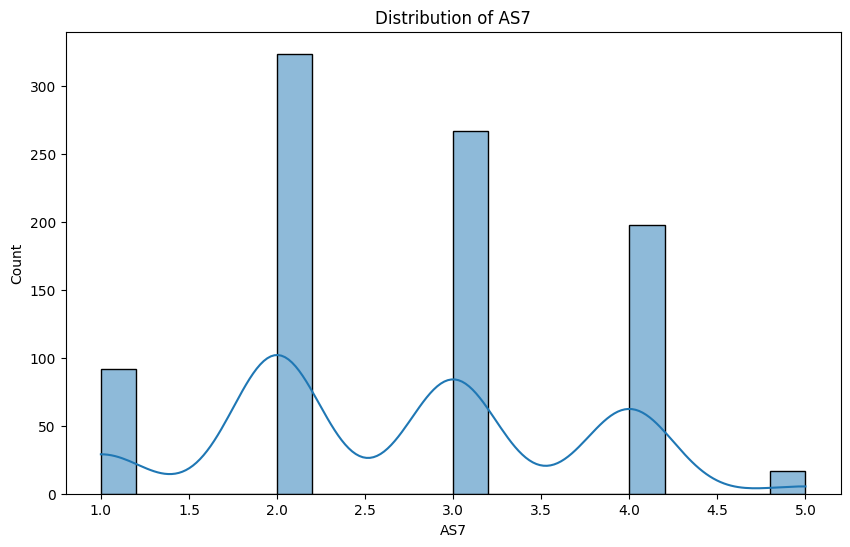

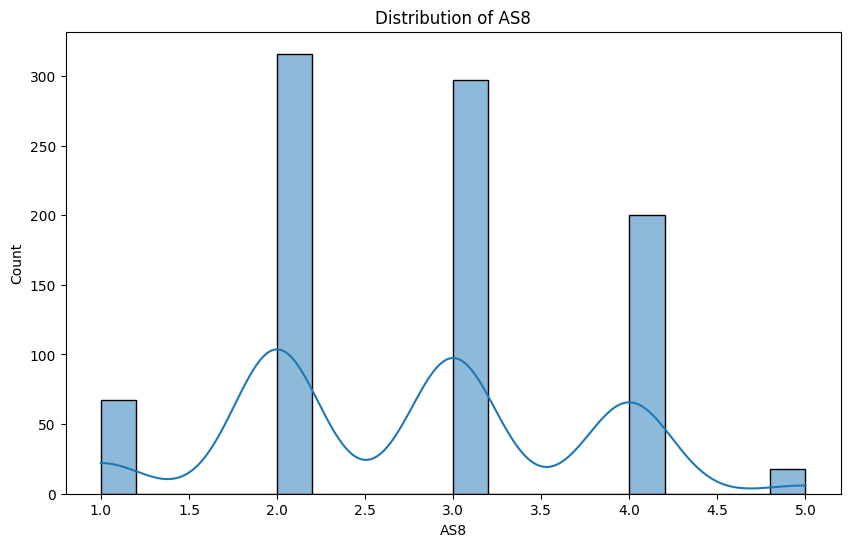

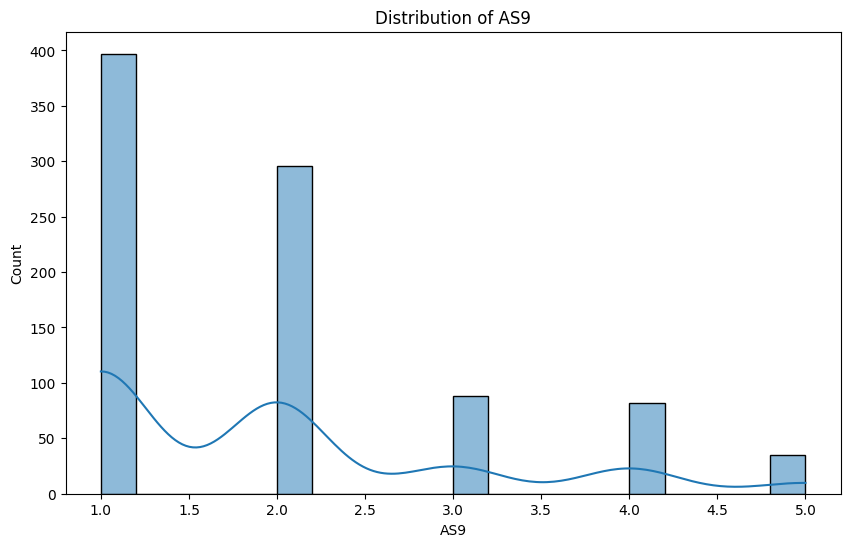

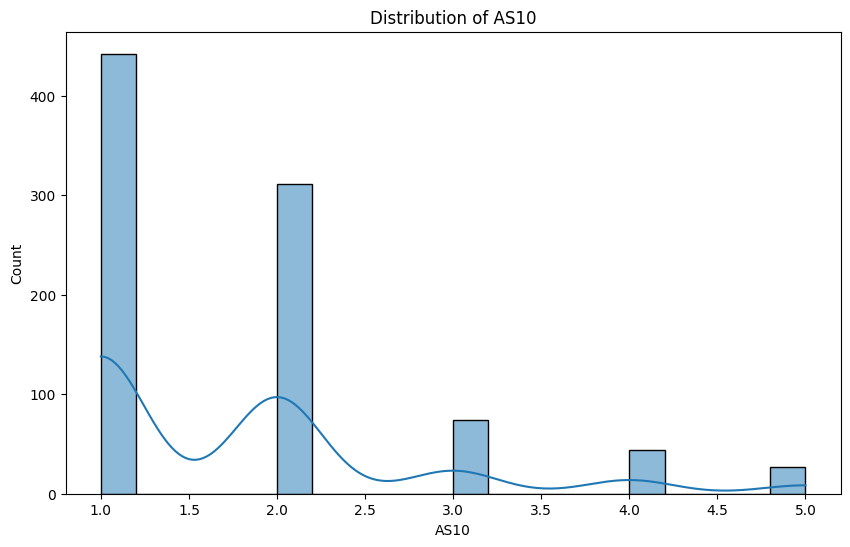

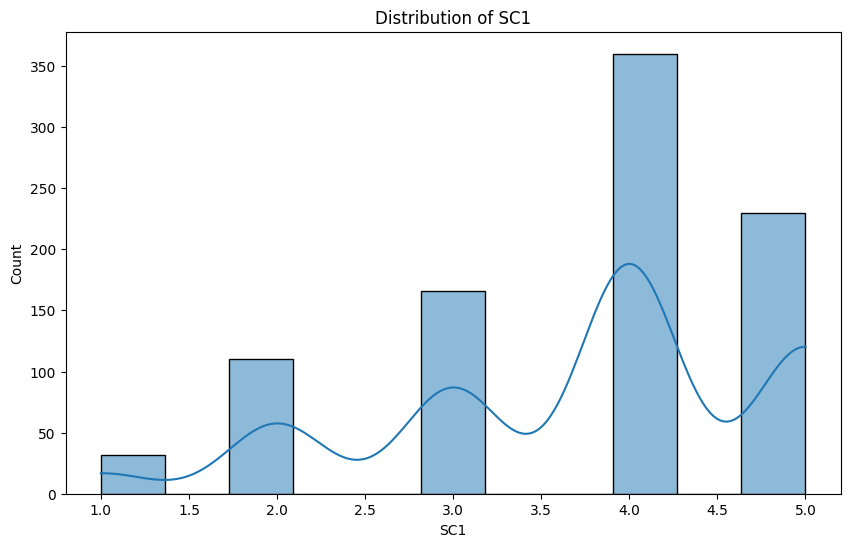

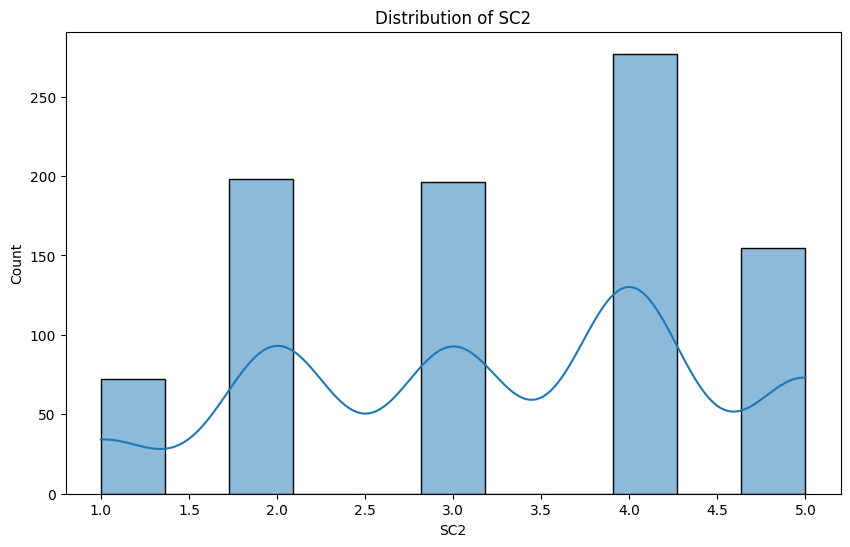

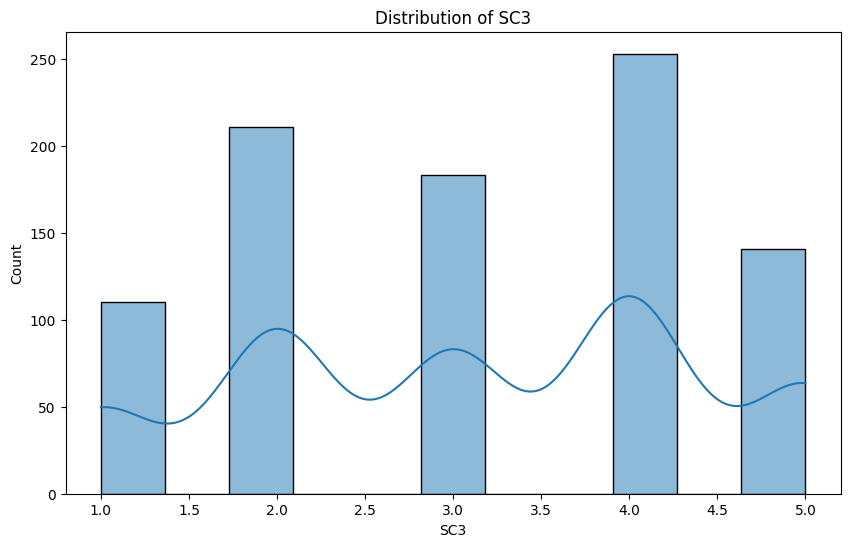

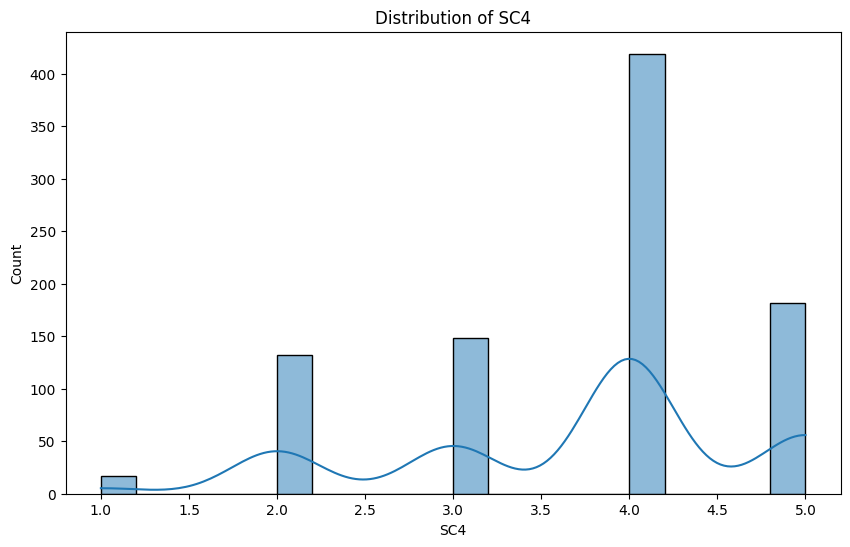

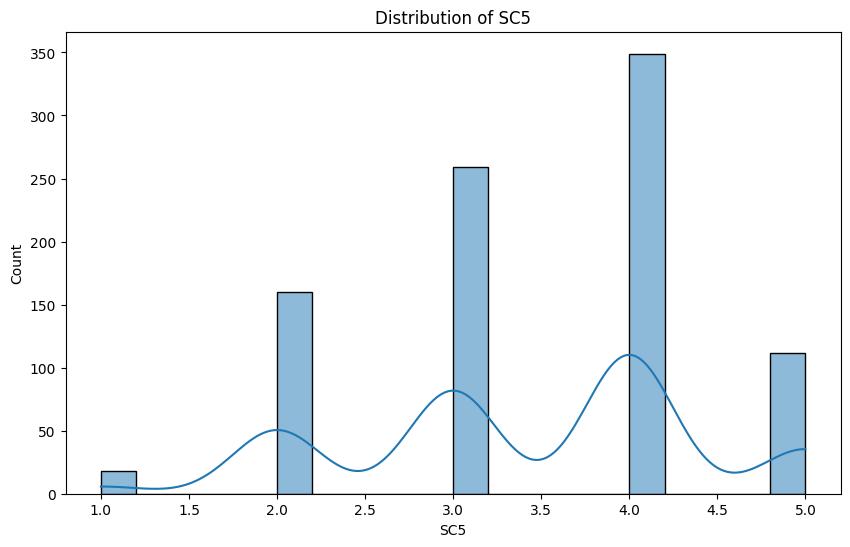

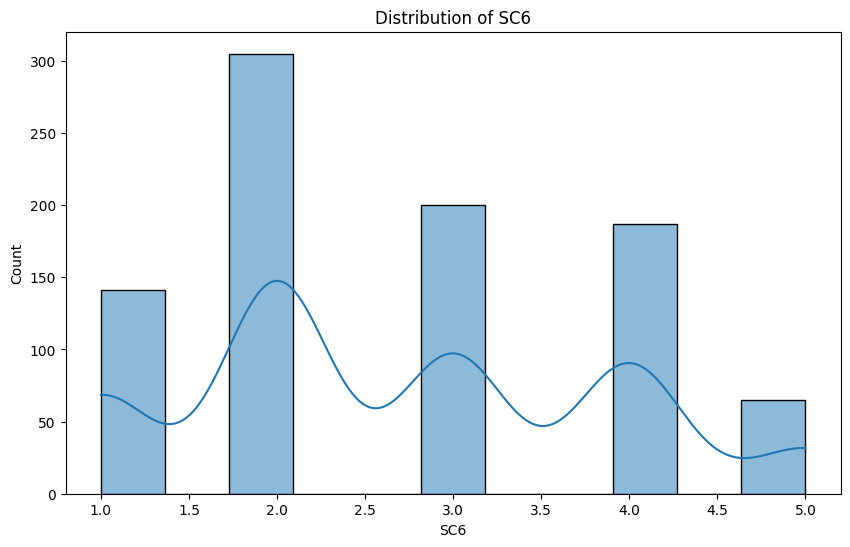

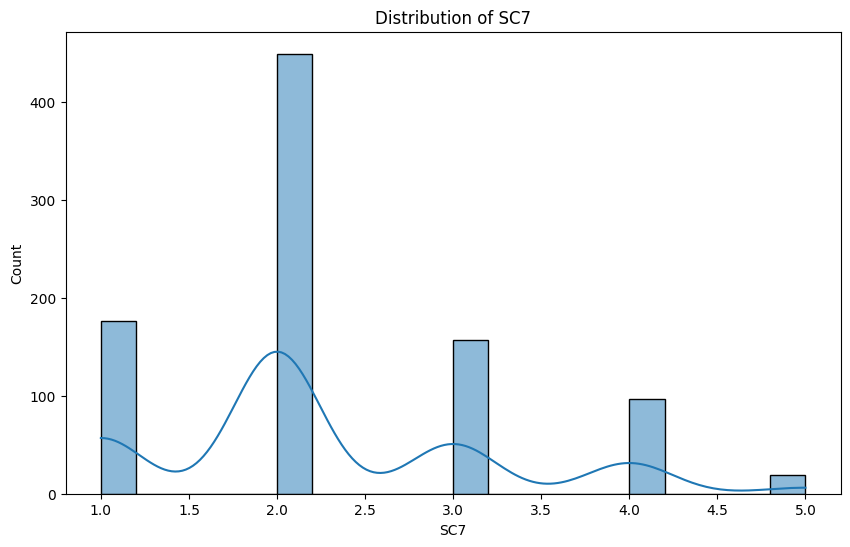

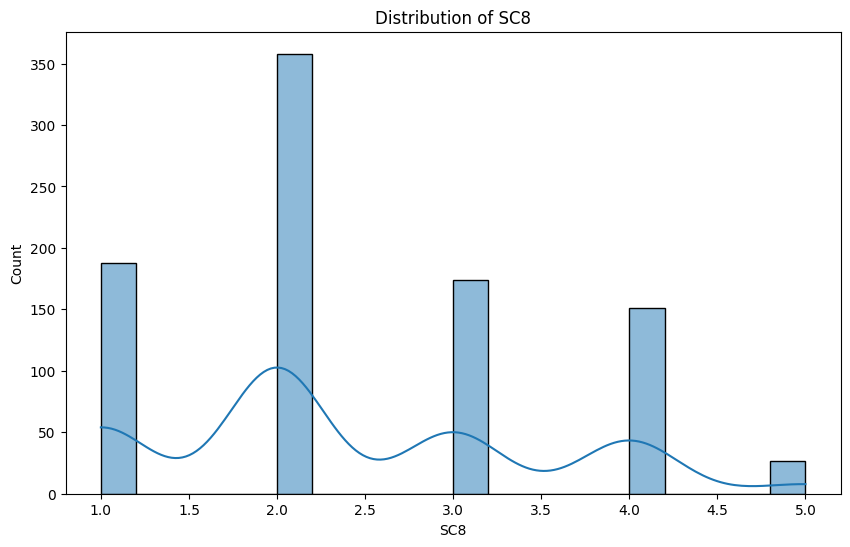

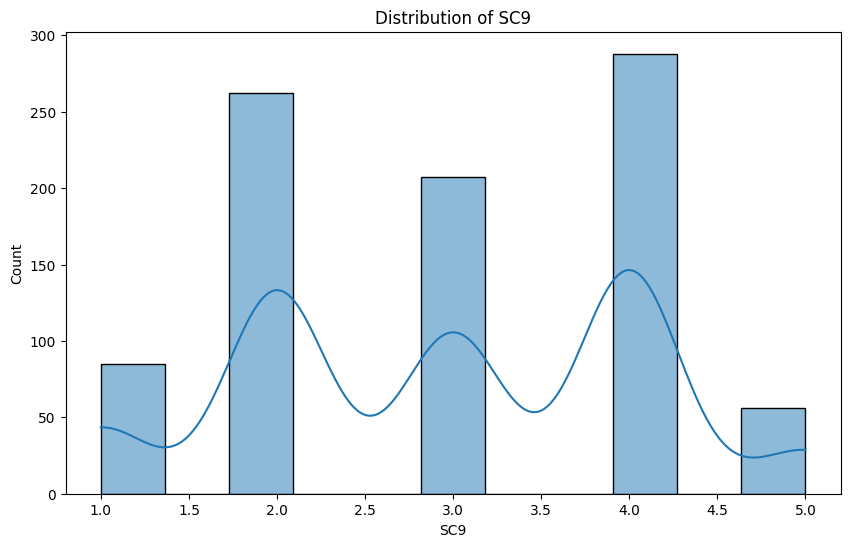

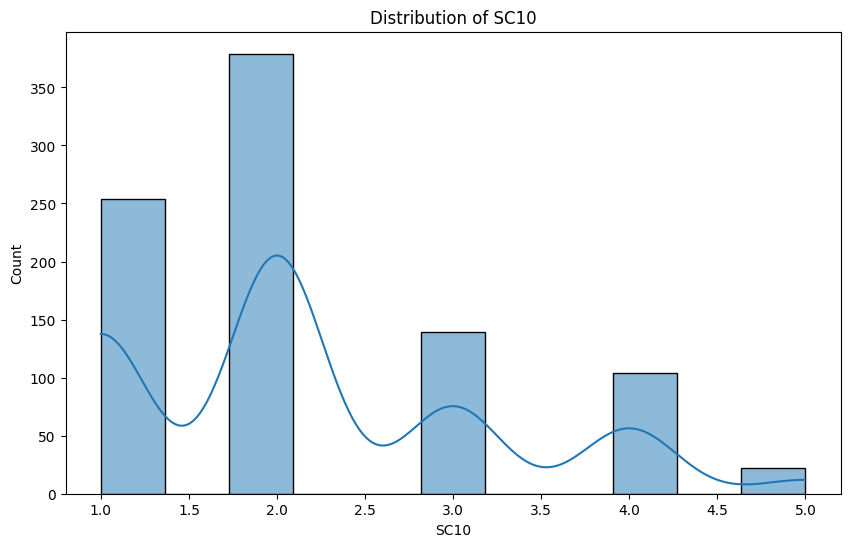

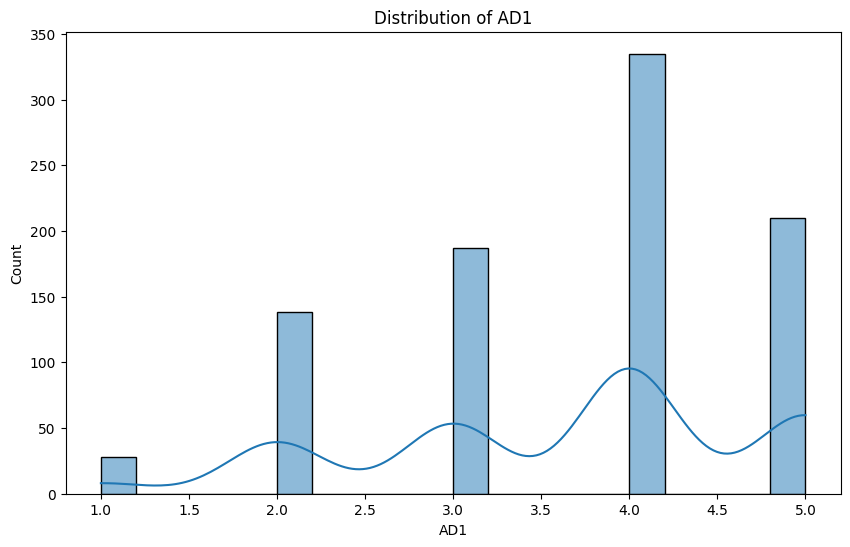

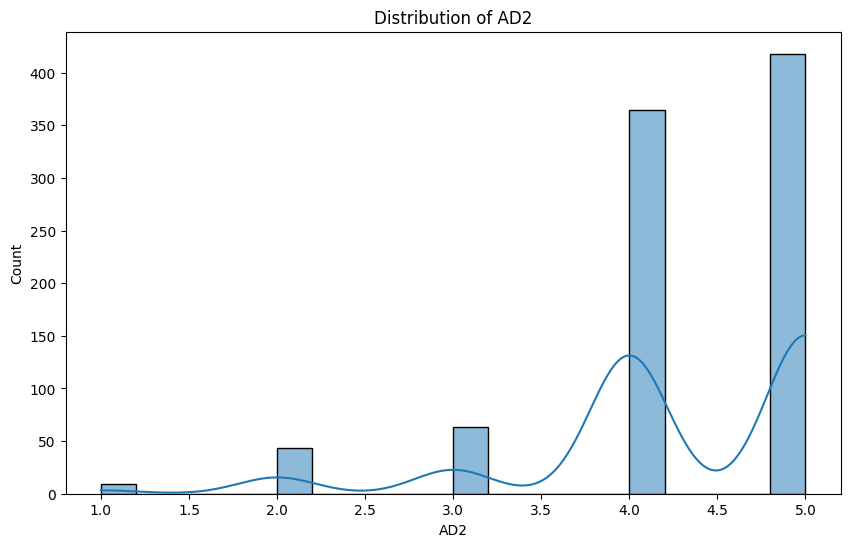

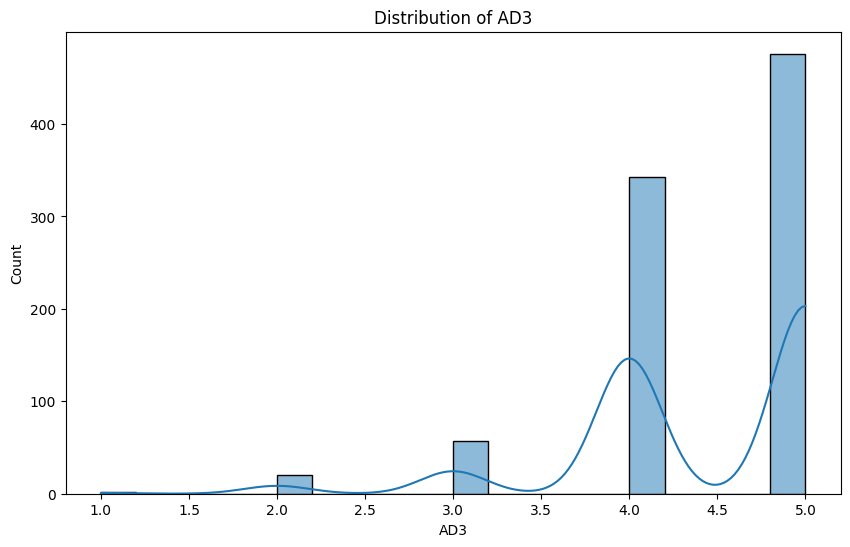

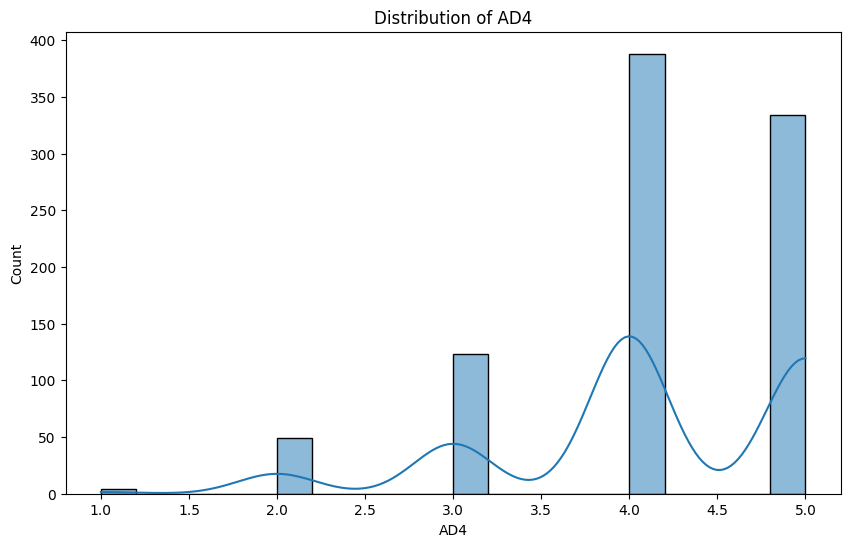

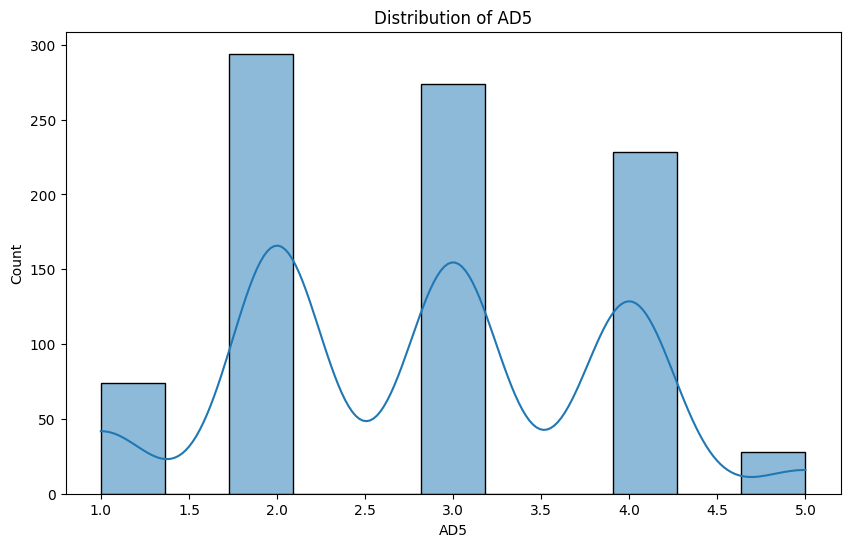

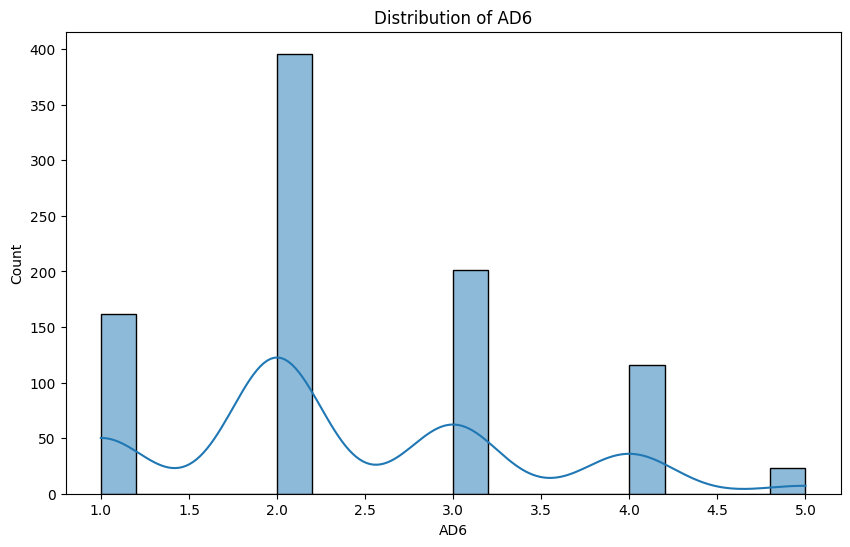

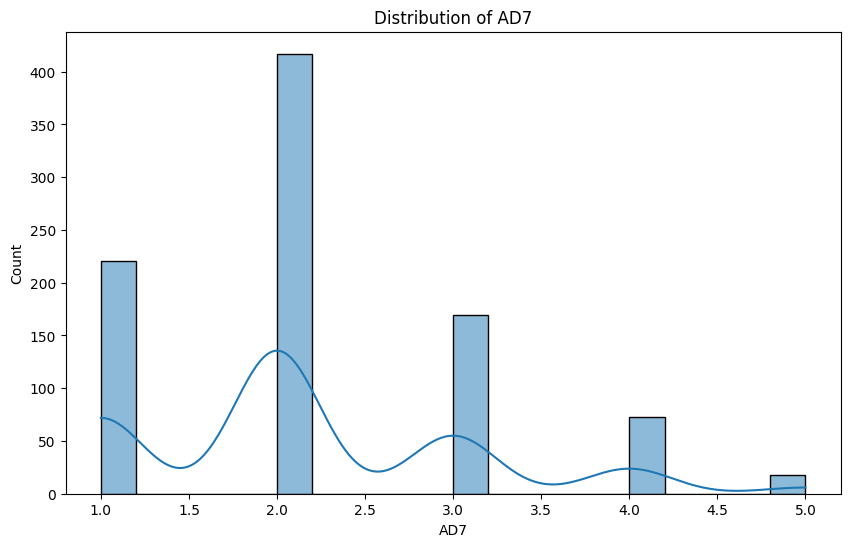

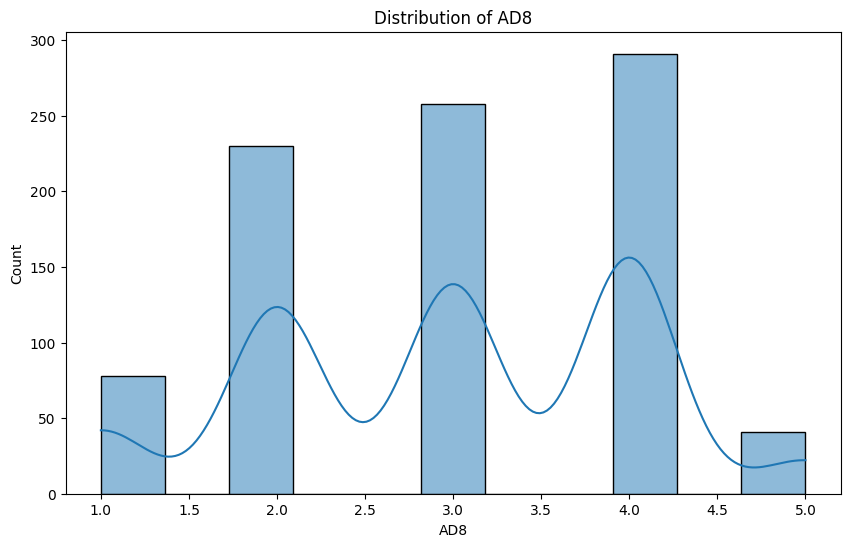

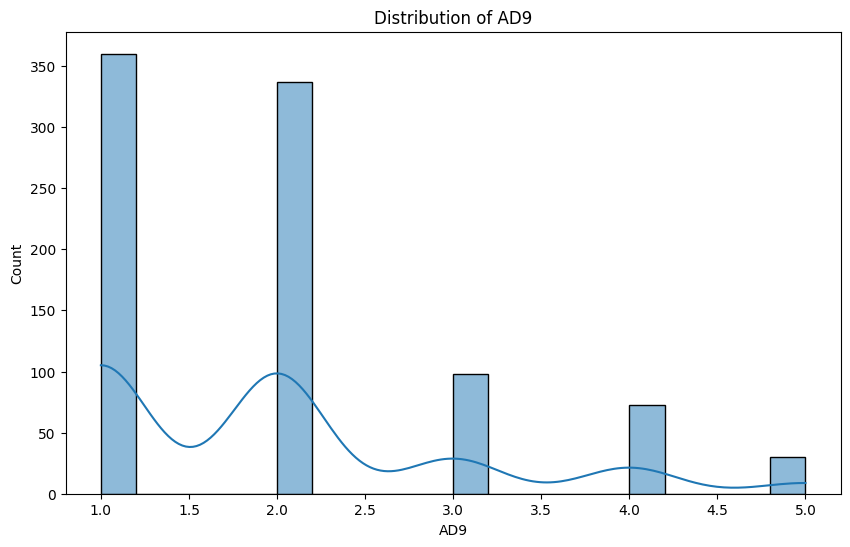

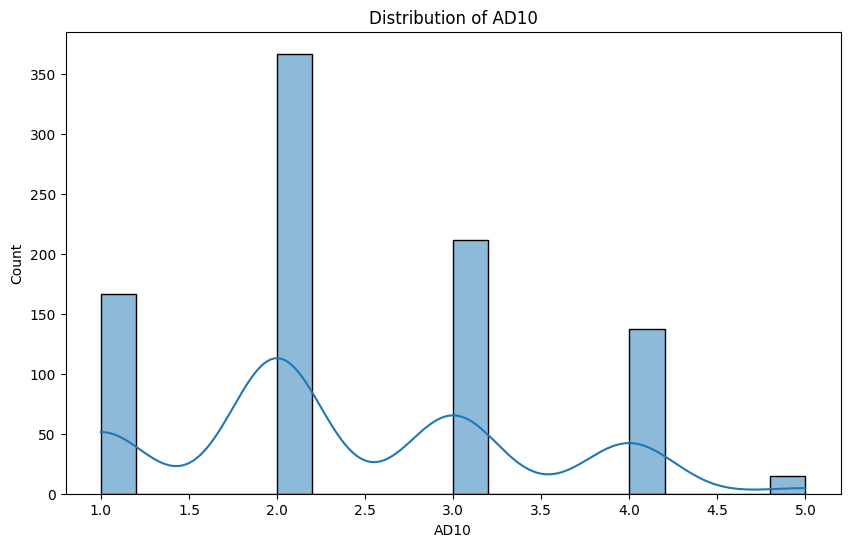

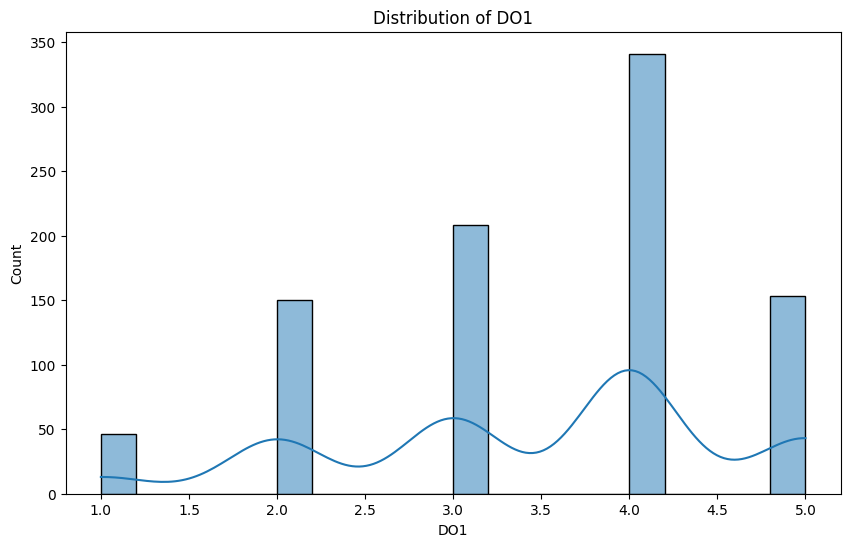

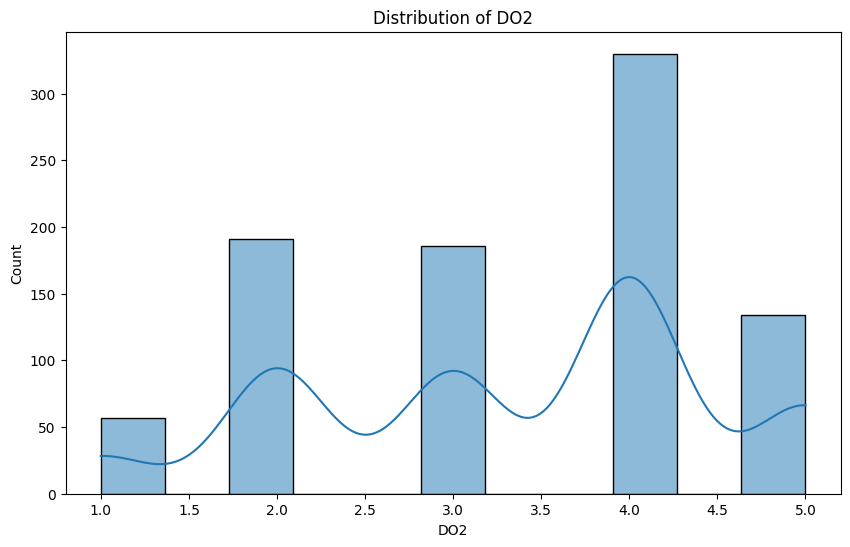

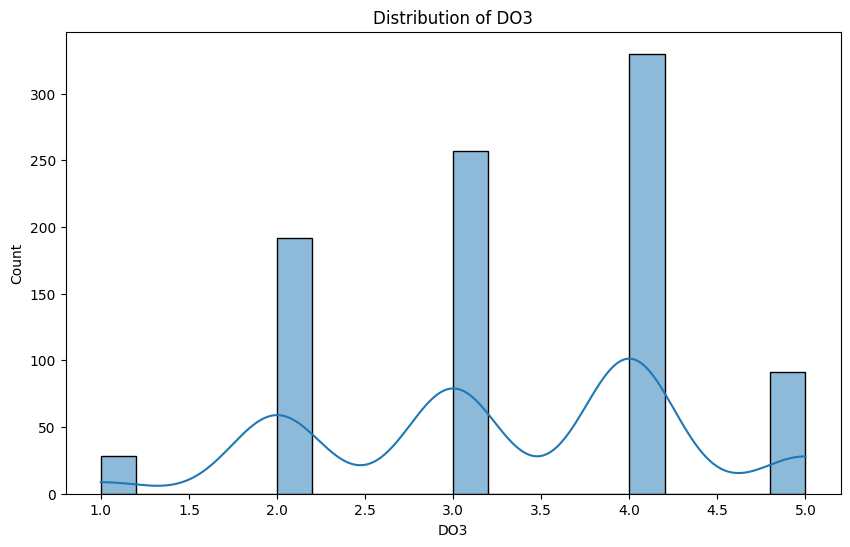

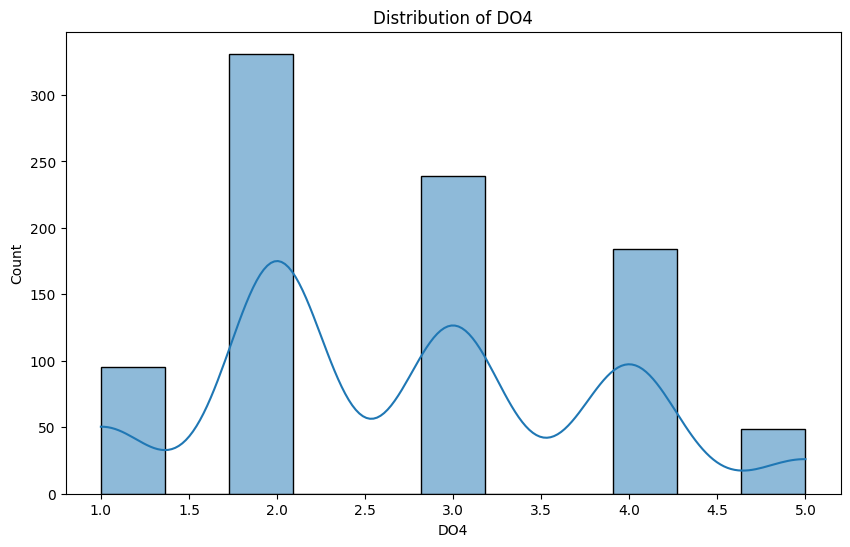

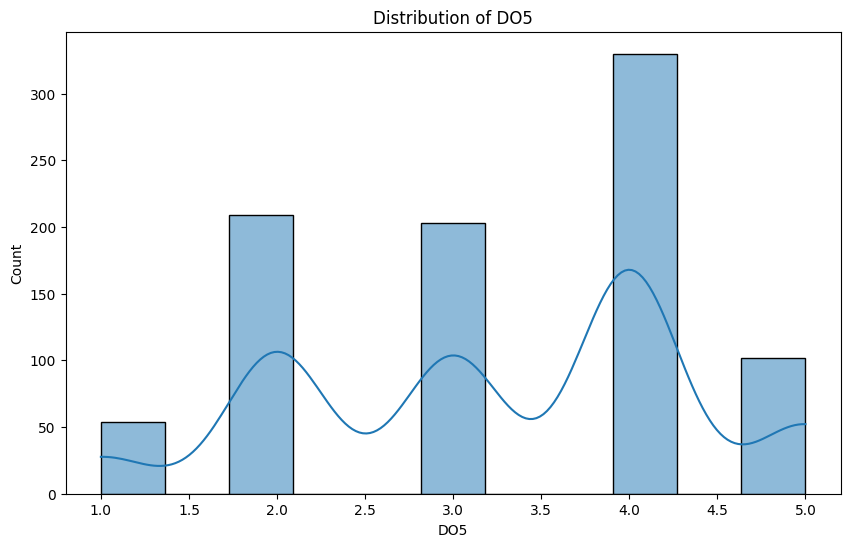

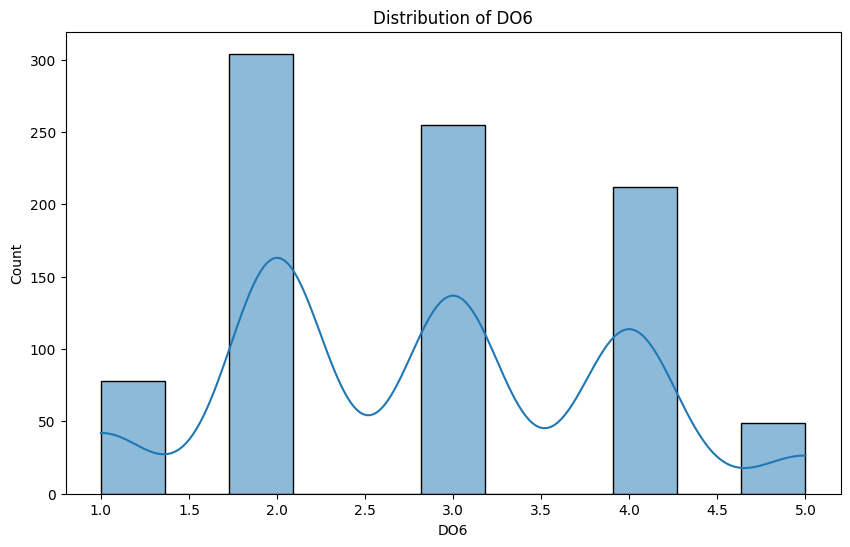

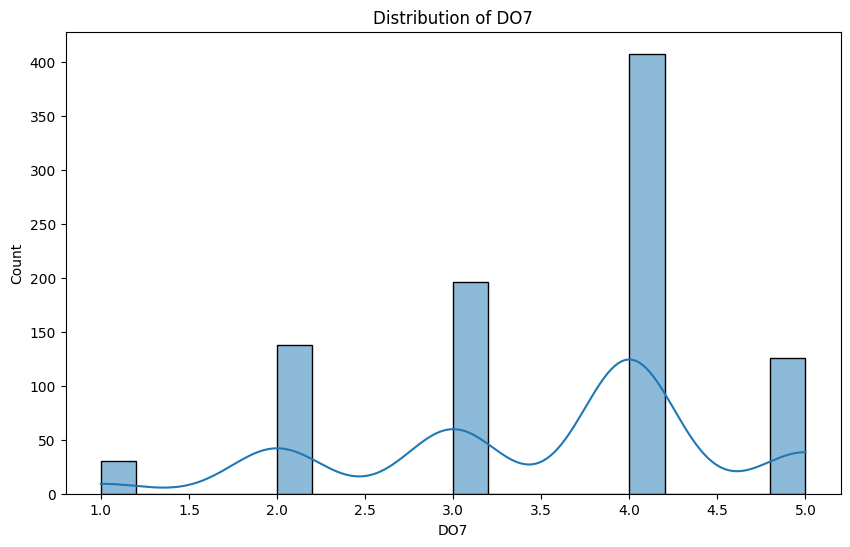

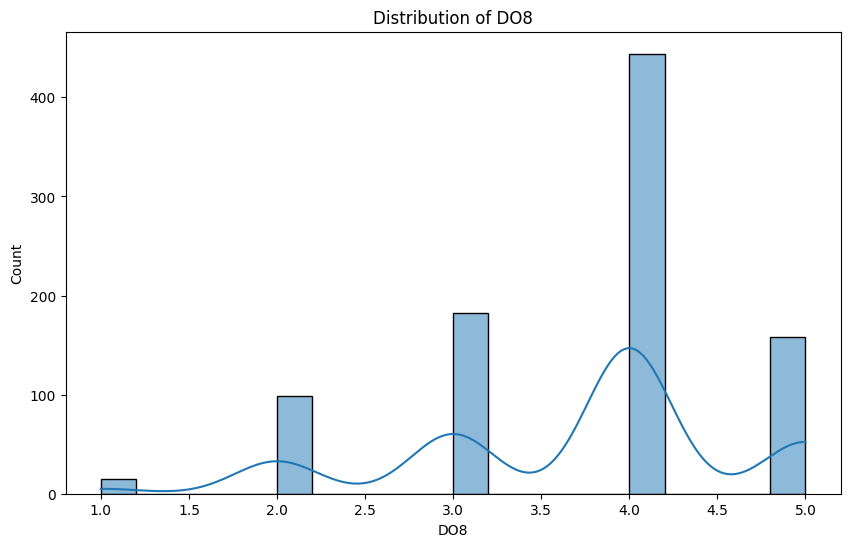

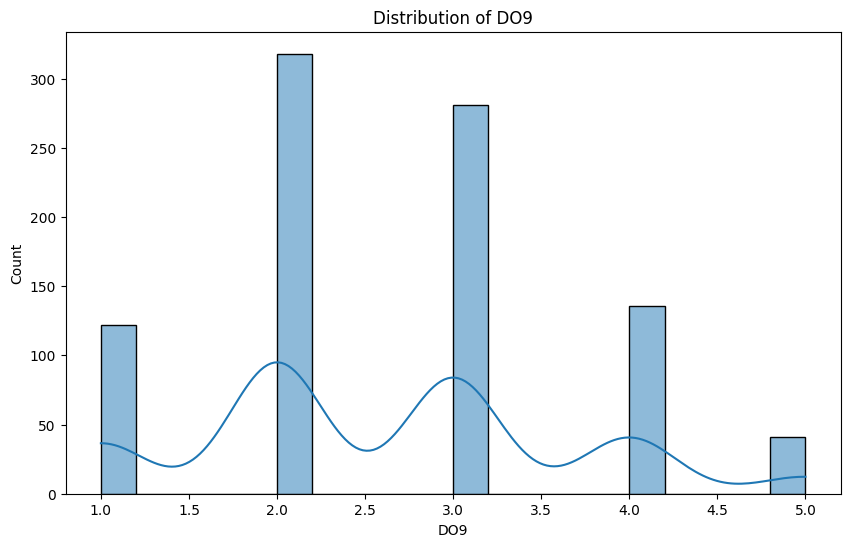

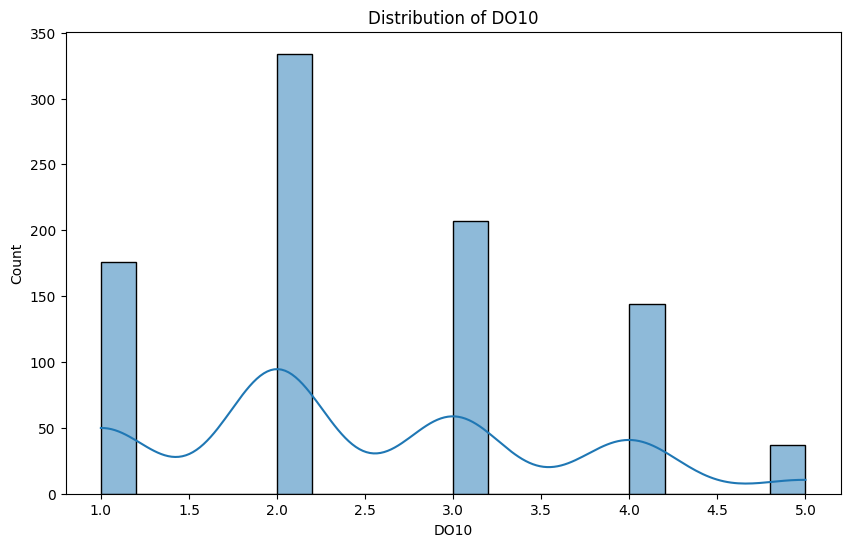

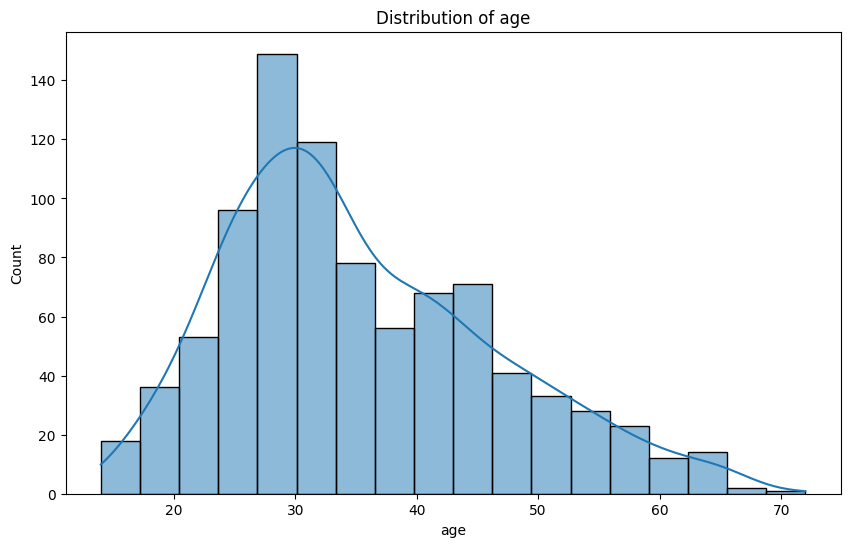

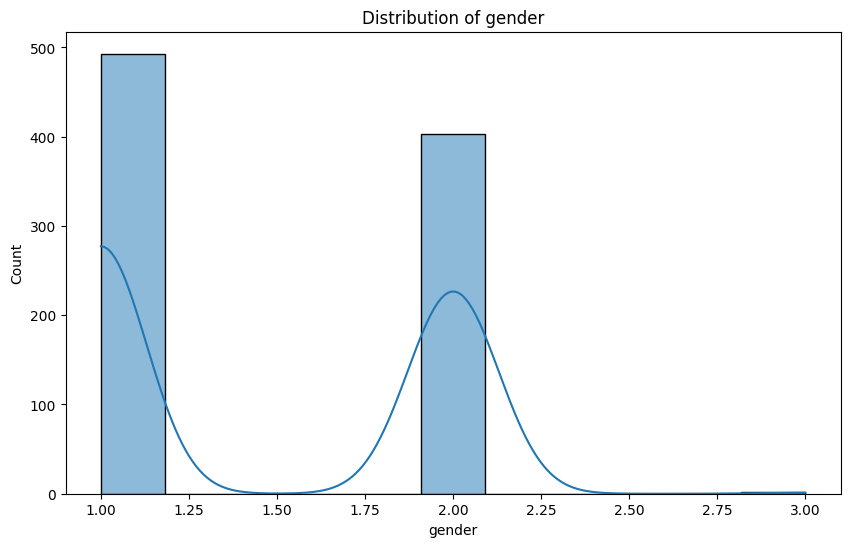

In [7]:
for column in datas.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=datas, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [8]:
datas.std()

AS1        1.056329
AS2        1.020093
AS3        1.039723
AS4        0.922623
AS5        0.944222
AS6        0.915463
AS7        0.986628
AS8        0.947332
AS9        1.120508
AS10       0.996594
SC1        1.083618
SC2        1.211316
SC3        1.274025
SC4        1.014428
SC5        0.985246
SC6         1.17329
SC7        0.963123
SC8         1.08572
SC9        1.113843
SC10       1.044627
AD1        1.094494
AD2        0.863469
AD3        0.728515
AD4        0.869167
AD5        1.002895
AD6        1.004599
AD7        0.955888
AD8        1.054169
AD9        1.065966
AD10       1.009682
DO1        1.109573
DO2         1.15151
DO3        1.012953
DO4        1.070216
DO5        1.112693
DO6        1.055296
DO7        1.019493
DO8        0.939421
DO9        1.042156
DO10       1.100369
age       11.160892
gender     0.502542
dtype: object

# PCA

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
df = datas.drop(columns=['age', 'gender'])  # drop the 'age' and 'gender' columns

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)

# Apply PCA
pca = PCA(n_components=5)  # change n_components to the number of dimensions you want
principalComponents = pca.fit_transform(df_scaled)

# Convert to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

principalDf


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,2.697022,1.220017,-3.399996,-0.590230,-0.832380
1,-2.827644,-0.159843,-1.354765,0.636820,0.346136
2,2.449826,0.736069,2.099142,-0.586535,1.237599
3,3.061937,4.493935,-1.373084,0.083476,0.925215
4,0.379991,-1.586085,-2.901401,2.380882,-0.039679
...,...,...,...,...,...
893,5.094361,0.458911,-0.992093,-0.163116,0.809426
894,0.006880,1.488476,0.430077,0.616499,-0.702903
895,-0.416621,-3.071343,1.322300,1.569330,-0.993516
896,-0.056893,0.864858,-1.217138,0.994333,0.732999


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming principalDf is your DataFrame with principal components
similarity_matrix = cosine_similarity(principalDf)

# Create a DataFrame for the similarity scores
similarity_df = pd.DataFrame(similarity_matrix, index=principalDf.index, columns=principalDf.index)

# Melt the DataFrame into the desired format
melted_df = similarity_df.reset_index().melt(id_vars='index', var_name='match_id', value_name='similarity_score')

# Rename the 'index' column to 'user_id'
melted_df = melted_df.rename(columns={'index': 'user_id'})

melted_df
melted_df.to_csv('similarity_cosine.csv')


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Assuming principalDf is your DataFrame with principal components
distance_matrix = euclidean_distances(principalDf)

# Create a DataFrame for the distance scores
distance_df = pd.DataFrame(distance_matrix, index=principalDf.index, columns=principalDf.index)

# Melt the DataFrame into the desired format
melted_df = distance_df.reset_index().melt(id_vars='index', var_name='match_id', value_name='distance_score')

# Rename the 'index' column to 'user_id'
melted_df = melted_df.rename(columns={'index': 'user_id'})

melted_df
melted_df.to_csv('similarity_euclidean.csv')
